#### Supervised Learning Exercise: Predicting Building Energy Efficiency

**Scenario**- You are working for an architecture firm, and your task is to build a model that predicts the energy efficiency rating of buildings based on features like wall area, roof area, overall height, etc.

In this exercise, you trained a RandomForestRegressor model to predict the energy efficiency of buildings based on features such as wall area, roof area, overall height, and glazing area.

In [4]:
# Import necessary libraries 
import pandas as pd  # For handling data in DataFrames
import numpy as np  # For numerical operations and generating random data
import matplotlib.pyplot as plt  # For plotting data
import seaborn as sns  # For visualizing data with statistical plots
import warnings  # To handle warnings
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.ensemble import RandomForestRegressor  # Random Forest model for regression tasks
from sklearn.metrics import mean_squared_error  # To evaluate the model using Mean Squared Error (MSE)

In [5]:
# Ignore warnings to keep the output clean
warnings.filterwarnings('ignore')

# Generate synthetic dataset for building features and energy efficiency ratings
np.random.seed(0)  # Set the seed for reproducibility
data_size = 500  # Number of data samples to generate

In [28]:
# Create a dictionary with random values for features and energy efficiency ratings
data = {
    'WallArea': np.random.randint(200, 400, data_size),  # Random integer values for wall area (range: 200-400)
    'RoofArea': np.random.randint(100, 200, data_size),  # Random integer values for roof area (range: 100-200)
    'OverallHeight': np.random.uniform(3, 10, data_size),  # Random float values for overall height (range: 3-10)
    'GlazingArea': np.random.uniform(0, 1, data_size),  # Random float values for glazing area (range: 0-1)
    'EnergyEfficiency': np.random.uniform(10, 50, data_size)  # Random float values for energy efficiency (range: 10-50)
}

print(data)

{'WallArea': array([272, 355, 248, 256, 239, 356, 342, 316, 230, 359, 326, 264, 264,
       339, 237, 328, 319, 308, 234, 323, 218, 232, 366, 359, 339, 325,
       318, 355, 233, 209, 333, 396, 331, 309, 212, 273, 339, 341, 365,
       316, 348, 251, 365, 225, 245, 203, 219, 342, 379, 318, 289, 330,
       274, 254, 335, 396, 334, 268, 240, 296, 352, 343, 250, 350, 299,
       279, 378, 364, 346, 310, 381, 328, 269, 325, 268, 368, 372, 212,
       205, 209, 228, 201, 323, 223, 215, 238, 394, 295, 298, 382, 262,
       346, 276, 355, 247, 289, 370, 249, 327, 368, 259, 206, 241, 206,
       331, 286, 329, 252, 286, 261, 382, 389, 362, 395, 202, 307, 361,
       328, 319, 223, 265, 265, 201, 220, 276, 295, 238, 397, 384, 221,
       290, 389, 301, 272, 336, 324, 356, 301, 342, 281, 378, 232, 255,
       206, 215, 300, 215, 292, 342, 222, 394, 217, 247, 346, 288, 208,
       316, 350, 273, 215, 388, 245, 226, 343, 396, 327, 325, 338, 284,
       375, 374, 317, 247, 269, 246, 226, 293, 373,

In [29]:
# Create a DataFrame from the generated data
df = pd.DataFrame(data)
print(df)

     WallArea  RoofArea  OverallHeight  GlazingArea  EnergyEfficiency
0         272       102       8.323115     0.725547         13.963008
1         355       142       6.997034     0.840878         40.747639
2         248       111       4.753630     0.776373         25.635901
3         256       168       9.798546     0.077242         12.423202
4         239       195       5.327076     0.631382         38.142952
..        ...       ...            ...          ...               ...
495       264       176       8.532502     0.534563         26.068841
496       245       143       8.479000     0.517083         26.892308
497       373       170       7.710053     0.724074         36.707854
498       215       140       9.845428     0.825190         45.599805
499       239       127       9.800334     0.922692         15.055187

[500 rows x 5 columns]


In [30]:
# Data preprocessing
# Split the dataset into features (X) and the target variable (y)
X = df.drop('EnergyEfficiency', axis=1)  # Features are all columns except 'EnergyEfficiency'
y = df['EnergyEfficiency']  # Target variable is 'EnergyEfficiency'

print(y)

0      13.963008
1      40.747639
2      25.635901
3      12.423202
4      38.142952
         ...    
495    26.068841
496    26.892308
497    36.707854
498    45.599805
499    15.055187
Name: EnergyEfficiency, Length: 500, dtype: float64


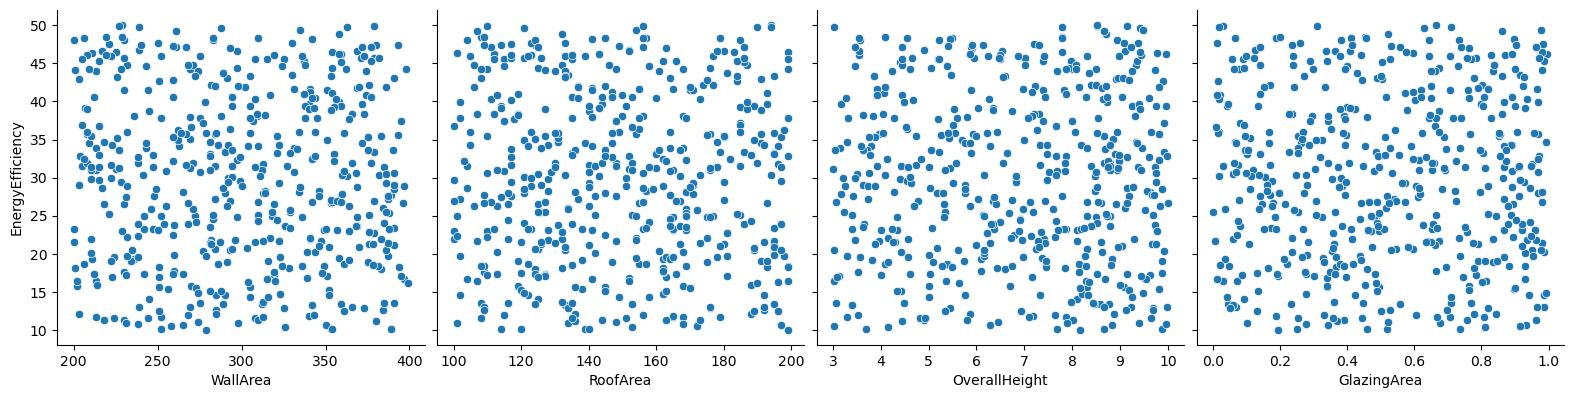

In [20]:
# Visualize the relationships between features and the target variable (Energy Efficiency)
# Create scatter plots to see how features relate to the target variable
sns.pairplot(df, x_vars=['WallArea', 'RoofArea', 'OverallHeight', 'GlazingArea'], y_vars='EnergyEfficiency', height=4, aspect=1, kind='scatter')
plt.show()  # Display the plots

In [21]:
# Split the data into training and testing sets
# 80% of the data will be used for training, and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Train a Random Forest model
model = RandomForestRegressor()  # Initialize the Random Forest model
model.fit(X_train, y_train)  # Train the model using the training data

RandomForestRegressor()

In [23]:
# Predict the target variable (Energy Efficiency) using the test data
predictions = model.predict(X_test)

print(predictions)

In [24]:
# Evaluate the model by calculating the Mean Squared Error (MSE)
# MSE measures the average squared difference between actual and predicted values
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")  # Output the MSE

Mean Squared Error: 144.04265463216421


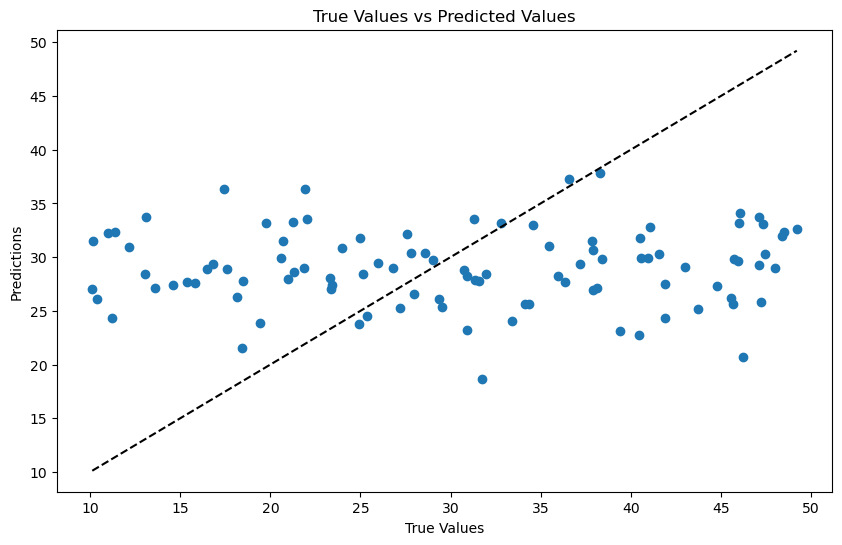

In [27]:
# Plot the True values vs Predicted values
plt.figure(figsize=(10, 6))  # Create a new figure with a specified size
plt.scatter(y_test, predictions)  # Scatter plot of true values vs predicted values
plt.xlabel("True Values")  # Label for the x-axis
plt.ylabel("Predictions")  # Label for the y-axis
plt.title("True Values vs Predicted Values")  # Title of the plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Add a diagonal line (perfect predictions)
plt.show()  # Display the plot